In [45]:
import numpy as np
import pandas as pd

# VAYALPATI_KOUSHIK_REDDY


In [46]:
koushik_data=pd.read_csv("Patient_Characteristics_Survey__PCS__2022__Persons_Served_by_Survey_Year__Region_of_Provider__Gender__Age_Group_and_Race_Ethnicity.csv")

In [53]:
num_data=koushik_data.describe()
categ_statasticss = {}
for clmn in koushik_data.select_dtypes(include=['object']):
    categ_statasticss[clmn] = koushik_data[clmn].value_counts()

In [55]:
#let us know what actually our data contains
for clmnn, counts in categ_statasticss.items():
    print(f"\n{clmnn}:")
    print(counts)


Program Category:
OUTPATIENT     146570
RESIDENTIAL     29737
SUPPORT         19440
INPATIENT        7533
EMERGENCY        3332
Name: Program Category, dtype: int64

Region Served:
NEW YORK CITY REGION    102170
WESTERN REGION           34551
HUDSON RIVER REGION      30102
CENTRAL NY REGION        23114
LONG ISLAND REGION       16675
Name: Region Served, dtype: int64

Age Group:
ADULT    163797
CHILD     42815
Name: Age Group, dtype: int64

Sex:
FEMALE            111578
MALE               93555
UNKNOWN             1220
X (NON-BINARY)       259
Name: Sex, dtype: int64

Transgender:
NO, NOT TRANSGENDER     181647
UNKNOWN                  18191
YES, TRANSGENDER          4246
CLIENT DIDN'T ANSWER      2528
Name: Transgender, dtype: int64

Sexual Orientation:
STRAIGHT OR HETEROSEXUAL    146694
UNKNOWN                      33225
BISEXUAL                      8888
CLIENT DID NOT ANSWER         7126
LESBIAN OR GAY                6450
OTHER                         4229
Name: Sexual Orientation

# main statstics about the dataset

In [57]:
# 2 main statstics about the dataset
# let us assume our dataframe named as koushik_data
print("The Number of entries (rows):", koushik_data.shape[0])
print("The Number of features (columns):", koushik_data.shape[1])

# let us dispaly concised information of the data
print("\nDataFrame Summary:")
print(koushik_data.info())

The Number of entries (rows): 206612
The Number of features (columns): 76

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206612 entries, 0 to 206611
Data columns (total 76 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Survey Year                       206612 non-null  int64 
 1   Program Category                  206612 non-null  object
 2   Region Served                     206612 non-null  object
 3   Age Group                         206612 non-null  object
 4   Sex                               206612 non-null  object
 5   Transgender                       206612 non-null  object
 6   Sexual Orientation                206612 non-null  object
 7   Hispanic Ethnicity                206612 non-null  object
 8   Race                              206612 non-null  object
 9   Living Situation                  206612 non-null  object
 10  Household Composition             

In [105]:
koushik_data.describe()

,Survey Year,Three Digit Residence Zip Code
count,206612.0,206612.000000
mean,2022.0,227.379373
std,0.0,286.215142
min,2022.0,100.000000
25%,2022.0,109.000000
50%,2022.0,115.000000
75%,2022.0,140.000000
max,2022.0,999.000000


# Standardized the string formats

In [58]:
# let us Standardized the string formats for all object-type in the columns
for column in koushik_data.select_dtypes(include='object').columns:
    koushik_data[column] = koushik_data[column].str.lower()

# Detecting the Outliers and removal

In [59]:
#  at first the  numerical features are selected
numerical_columns = koushik_data.select_dtypes(include=['int64', 'float64']).columns

# for each numerical feature IQR is calculated
Q1 = koushik_data[numerical_columns].quantile(0.25)
Q3 = koushik_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# let us Identify if any outliers are present
outliers = ((koushik_data[numerical_columns] < (Q1 - 1.5 * IQR)) | (koushik_data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Let us display the rows that contains the outlier in them
print("Rows that conatins the outliers are as follows:")
print(koushik_data[outliers])

Rows that conatins the outliers are as follows:
        Survey Year Program Category         Region Served Age Group     Sex  \
19             2022        emergency  new york city region     adult  female   
26             2022       outpatient        western region     adult  female   
48             2022       outpatient     central ny region     child  female   
54             2022       outpatient     central ny region     adult    male   
123            2022       outpatient   hudson river region     adult    male   
...             ...              ...                   ...       ...     ...   
206548         2022       outpatient   hudson river region     adult    male   
206550         2022        inpatient   hudson river region     adult    male   
206553         2022      residential   hudson river region     adult    male   
206554         2022       outpatient        western region     adult  female   
206594         2022          support   hudson river region     child  fe

In [60]:
#now let us remove unwanted outliers
# for each numerical feature IQR is calculated
Q1 = koushik_data[numerical_columns].quantile(0.25)
Q3 = koushik_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# 1.5 threshold is defined for outliers
threshold = 1.5

# identification of the outliers
outliers = ((koushik_data[numerical_columns] < (Q1 - threshold * IQR)) | (koushik_data[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)

# We have removed the outliers from the data
cleaned_koushik = koushik_data[~outliers]

# Print the number of outliers removed
print("Number of outliers removed:", outliers.sum())


Number of outliers removed: 26376


# Plotting the graphs vs target variable i.e Mental illness

<ipython-input-61-a02b1b297575>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mental Illness', data=cleaned_koushik, palette='Set1')


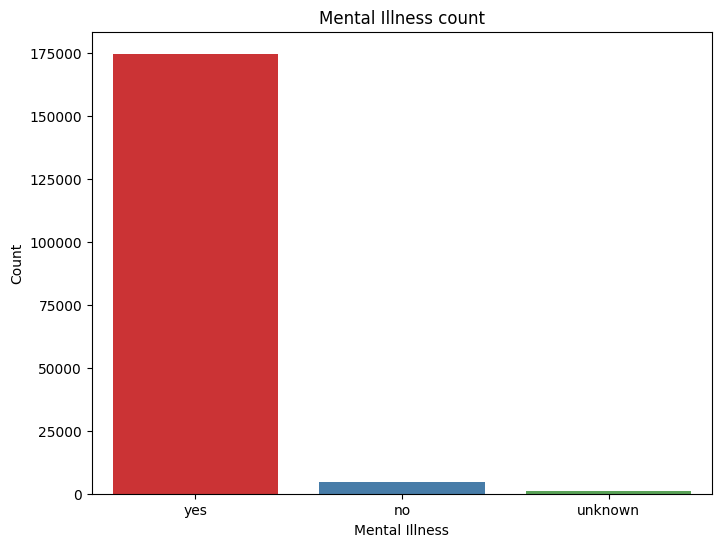

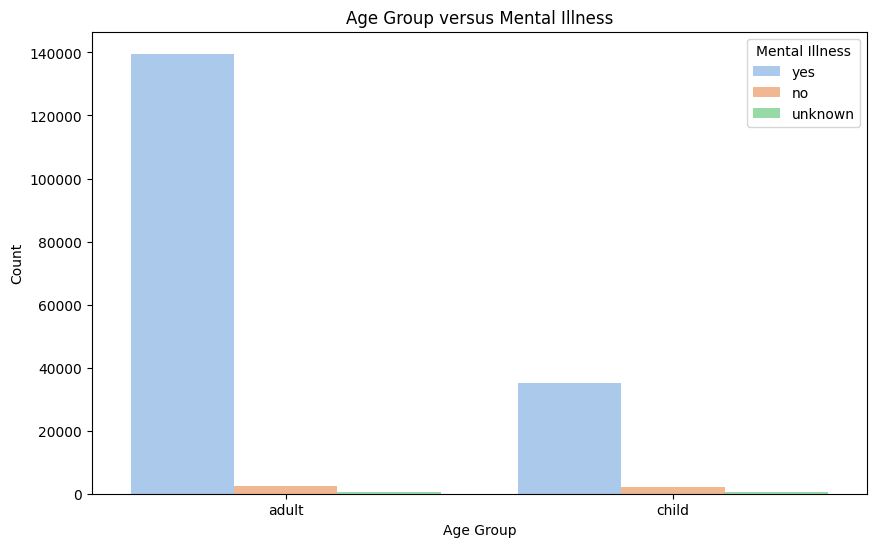

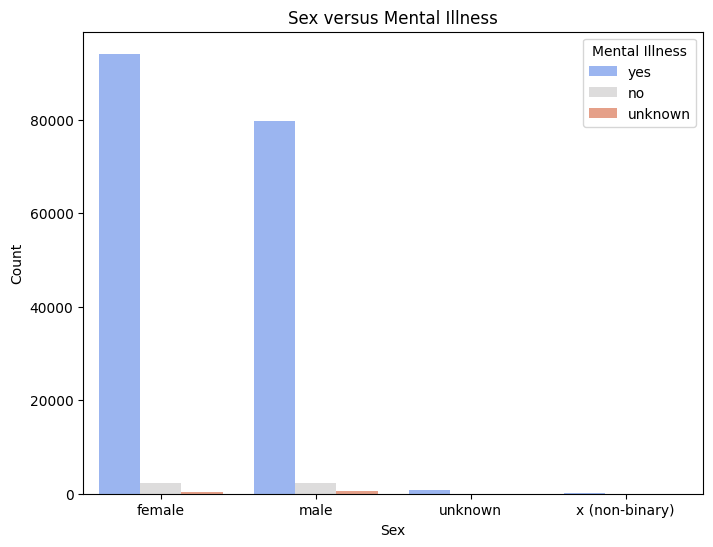

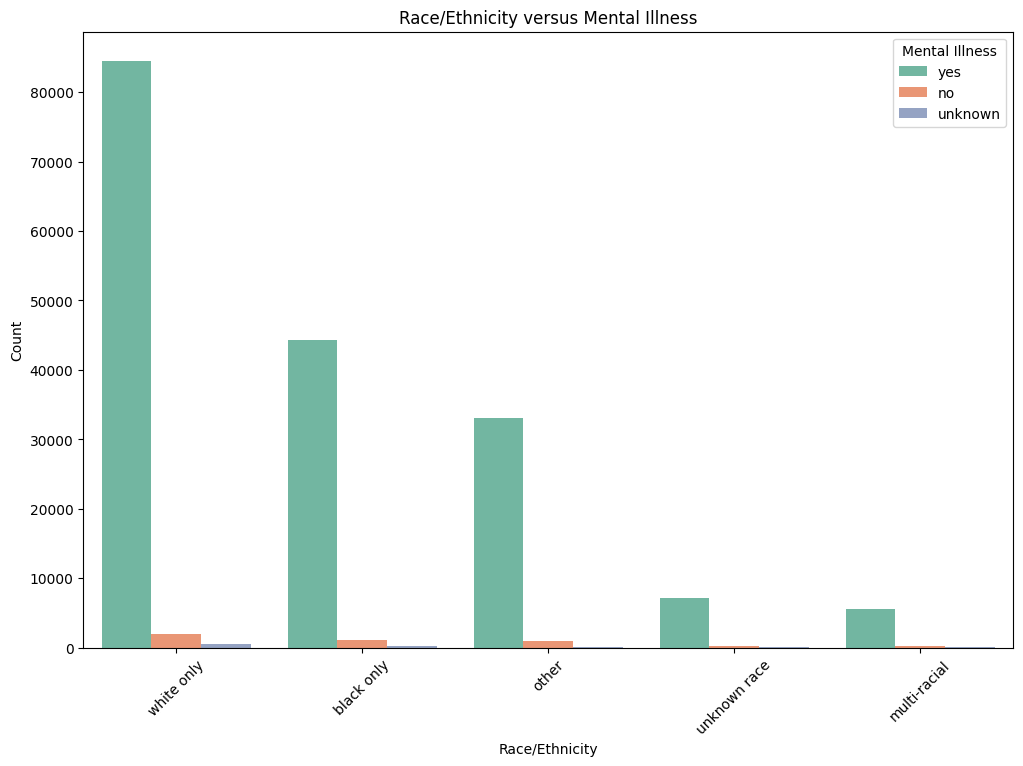

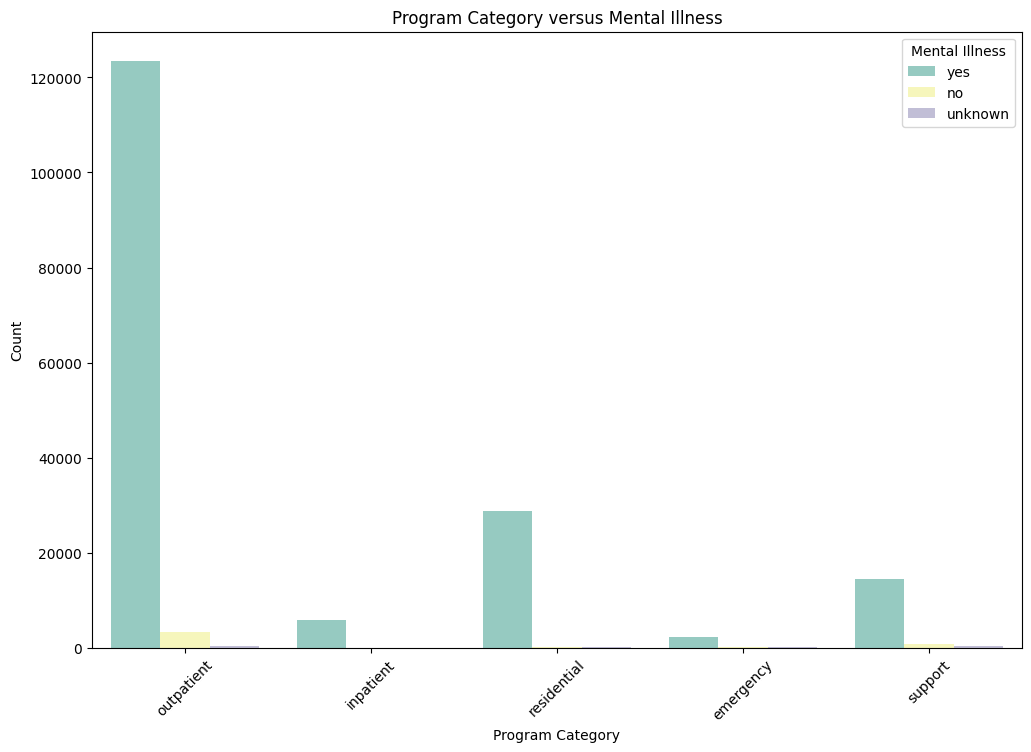

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mental Illness count
plt.figure(figsize=(8, 6))
sns.countplot(x='Mental Illness', data=cleaned_koushik, palette='Set1')
plt.title('Mental Illness count')
plt.xlabel('Mental Illness')
plt.ylabel('Count')
plt.show()

# Age Group vs. Mental Illness visualisation
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Mental Illness', data=cleaned_koushik, palette='pastel')
plt.title('Age Group versus Mental Illness')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Mental Illness')
plt.show()

#  Sex vs. Mental Illness visualisation
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Mental Illness', data=cleaned_koushik, palette='coolwarm')
plt.title('Sex versus Mental Illness')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Mental Illness')
plt.show()

#  Race/Ethnicity vs. Mental Illness visualisation
plt.figure(figsize=(12, 8))
sns.countplot(x='Race', hue='Mental Illness', data=cleaned_koushik, palette='Set2')
plt.title('Race/Ethnicity versus Mental Illness')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.legend(title='Mental Illness')
plt.xticks(rotation=45)
plt.show()

# Program Category vs. Mental Illness visualisation
plt.figure(figsize=(12, 8))
sns.countplot(x='Program Category', hue='Mental Illness', data=cleaned_koushik, palette='Set3')
plt.title('Program Category versus Mental Illness')
plt.xlabel('Program Category')
plt.ylabel('Count')
plt.legend(title='Mental Illness')
plt.xticks(rotation=45)
plt.show()


# manual checking and droping the unwanted and unrealted features

In [62]:
# manual checking and droping the features which are unrealted to our target variable

m_cleaned_data = cleaned_koushik.drop(['Survey Year', 'Three Digit Residence Zip Code','Region Served', 'Race', 'Preferred Language', 'Religious Preference'], axis=1)



In [64]:
print("Number of entries (rows):", m_cleaned_data.shape[0])
print("Number of features (columns):", m_cleaned_data .shape[1])

# let us display concised summary of the cleaned DataFrame
print("\nDataFrame Summary:")
print(m_cleaned_data .info())

Number of entries (rows): 180236
Number of features (columns): 70

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180236 entries, 0 to 206611
Data columns (total 70 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Program Category                  180236 non-null  object
 1   Age Group                         180236 non-null  object
 2   Sex                               180236 non-null  object
 3   Transgender                       180236 non-null  object
 4   Sexual Orientation                180236 non-null  object
 5   Hispanic Ethnicity                180236 non-null  object
 6   Living Situation                  180236 non-null  object
 7   Household Composition             180236 non-null  object
 8   Veteran Status                    180236 non-null  object
 9   Employment Status                 180236 non-null  object
 10  Number Of Hours Worked Each Week  180236 n

# label encoding

In [70]:
string_columns = m_cleaned_data.select_dtypes(include=['object']).columns

In [71]:
#let us import the label encoder as our data set is unceratin that makes easy to classify
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in string_columns:
    m_cleaned_data[column + '_encoded'] = label_encoder.fit_transform(m_cleaned_data[column])
    m_cleaned_data.drop(column, axis=1, inplace=True)

In [72]:
m_cleaned_data.to_csv('data_encoded.csv', index=False)

In [74]:
# Iterating over  the columns and let us count the unique values
for column in m_cleaned_data.columns:
    unique_value_cnts_koushik = m_cleaned_data[column].value_counts()
    print(f"Unique value counts presented in the column :'{column}':\n{unique_value_cnts_koushik}\n")


Unique value counts presented in the column :'Program Category_encoded':
2    127222
3     29065
4     15607
1      5905
0      2437
Name: Program Category_encoded, dtype: int64

Unique value counts presented in the column :'Age Group_encoded':
0    142539
1     37697
Name: Age Group_encoded, dtype: int64

Unique value counts presented in the column :'Sex_encoded':
0    96819
1    82482
2      799
3      136
Name: Sex_encoded, dtype: int64

Unique value counts presented in the column :'Transgender_encoded':
1    168373
2      9956
0      1907
Name: Transgender_encoded, dtype: int64

Unique value counts presented in the column :'Sexual Orientation_encoded':
4    137174
5     20976
0      7621
1      6239
2      5382
3      2844
Name: Sexual Orientation_encoded, dtype: int64

Unique value counts presented in the column :'Hispanic Ethnicity_encoded':
0    132236
2     43956
1      4044
Name: Hispanic Ethnicity_encoded, dtype: int64

Unique value counts presented in the column :'Living Sit

In [106]:
m_cleaned_data.describe()

,Program Category_encoded,Age Group_encoded,Sex_encoded,Transgender_encoded,Sexual Orientation_encoded,Hispanic Ethnicity_encoded,Living Situation_encoded,Household Composition_encoded,Veteran Status_encoded,Employment Status_encoded,...,Medicaid and Medicare Insurance_encoded,No Insurance_encoded,Unknown Insurance Coverage_encoded,Medicaid Insurance_encoded,Medicaid Managed Insurance_encoded,Medicare Insurance_encoded,Private Insurance_encoded,Child Health Plus Insurance_encoded,Other Insurance_encoded,Criminal Justice Status_encoded
count,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,...,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000,180236.000000
mean,2.274640,0.209154,0.468763,1.044658,3.767899,0.510198,1.866031,0.592801,0.067878,1.784510,...,0.349176,0.108696,0.020368,1.488648,1.819354,0.453106,0.373827,0.109429,0.218613,0.200753
std,0.720453,0.406705,0.512269,0.252637,1.088952,0.858872,0.358910,0.772724,0.321017,1.045755,...,0.718817,0.430362,0.141255,0.852893,1.189633,0.801082,0.736441,0.355192,0.558514,0.538295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,4.000000,0.000000,2.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,4.000000,0.000000,2.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,3.000000,2.000000,5.000000,2.000000,2.000000,3.000000,2.000000,4.000000,...,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# finding correlation matrix

Correlation Matrix:
                                     Program Category_encoded  \
Program Category_encoded                             1.000000   
Age Group_encoded                                   -0.091384   
Sex_encoded                                          0.109582   
Transgender_encoded                                 -0.028306   
Sexual Orientation_encoded                           0.054137   
...                                                       ...   
Medicare Insurance_encoded                           0.087735   
Private Insurance_encoded                           -0.093063   
Child Health Plus Insurance_encoded                  0.019715   
Other Insurance_encoded                              0.070455   
Criminal Justice Status_encoded                      0.155107   

                                     Age Group_encoded  Sex_encoded  \
Program Category_encoded                     -0.091384     0.109582   
Age Group_encoded                             1.000000   

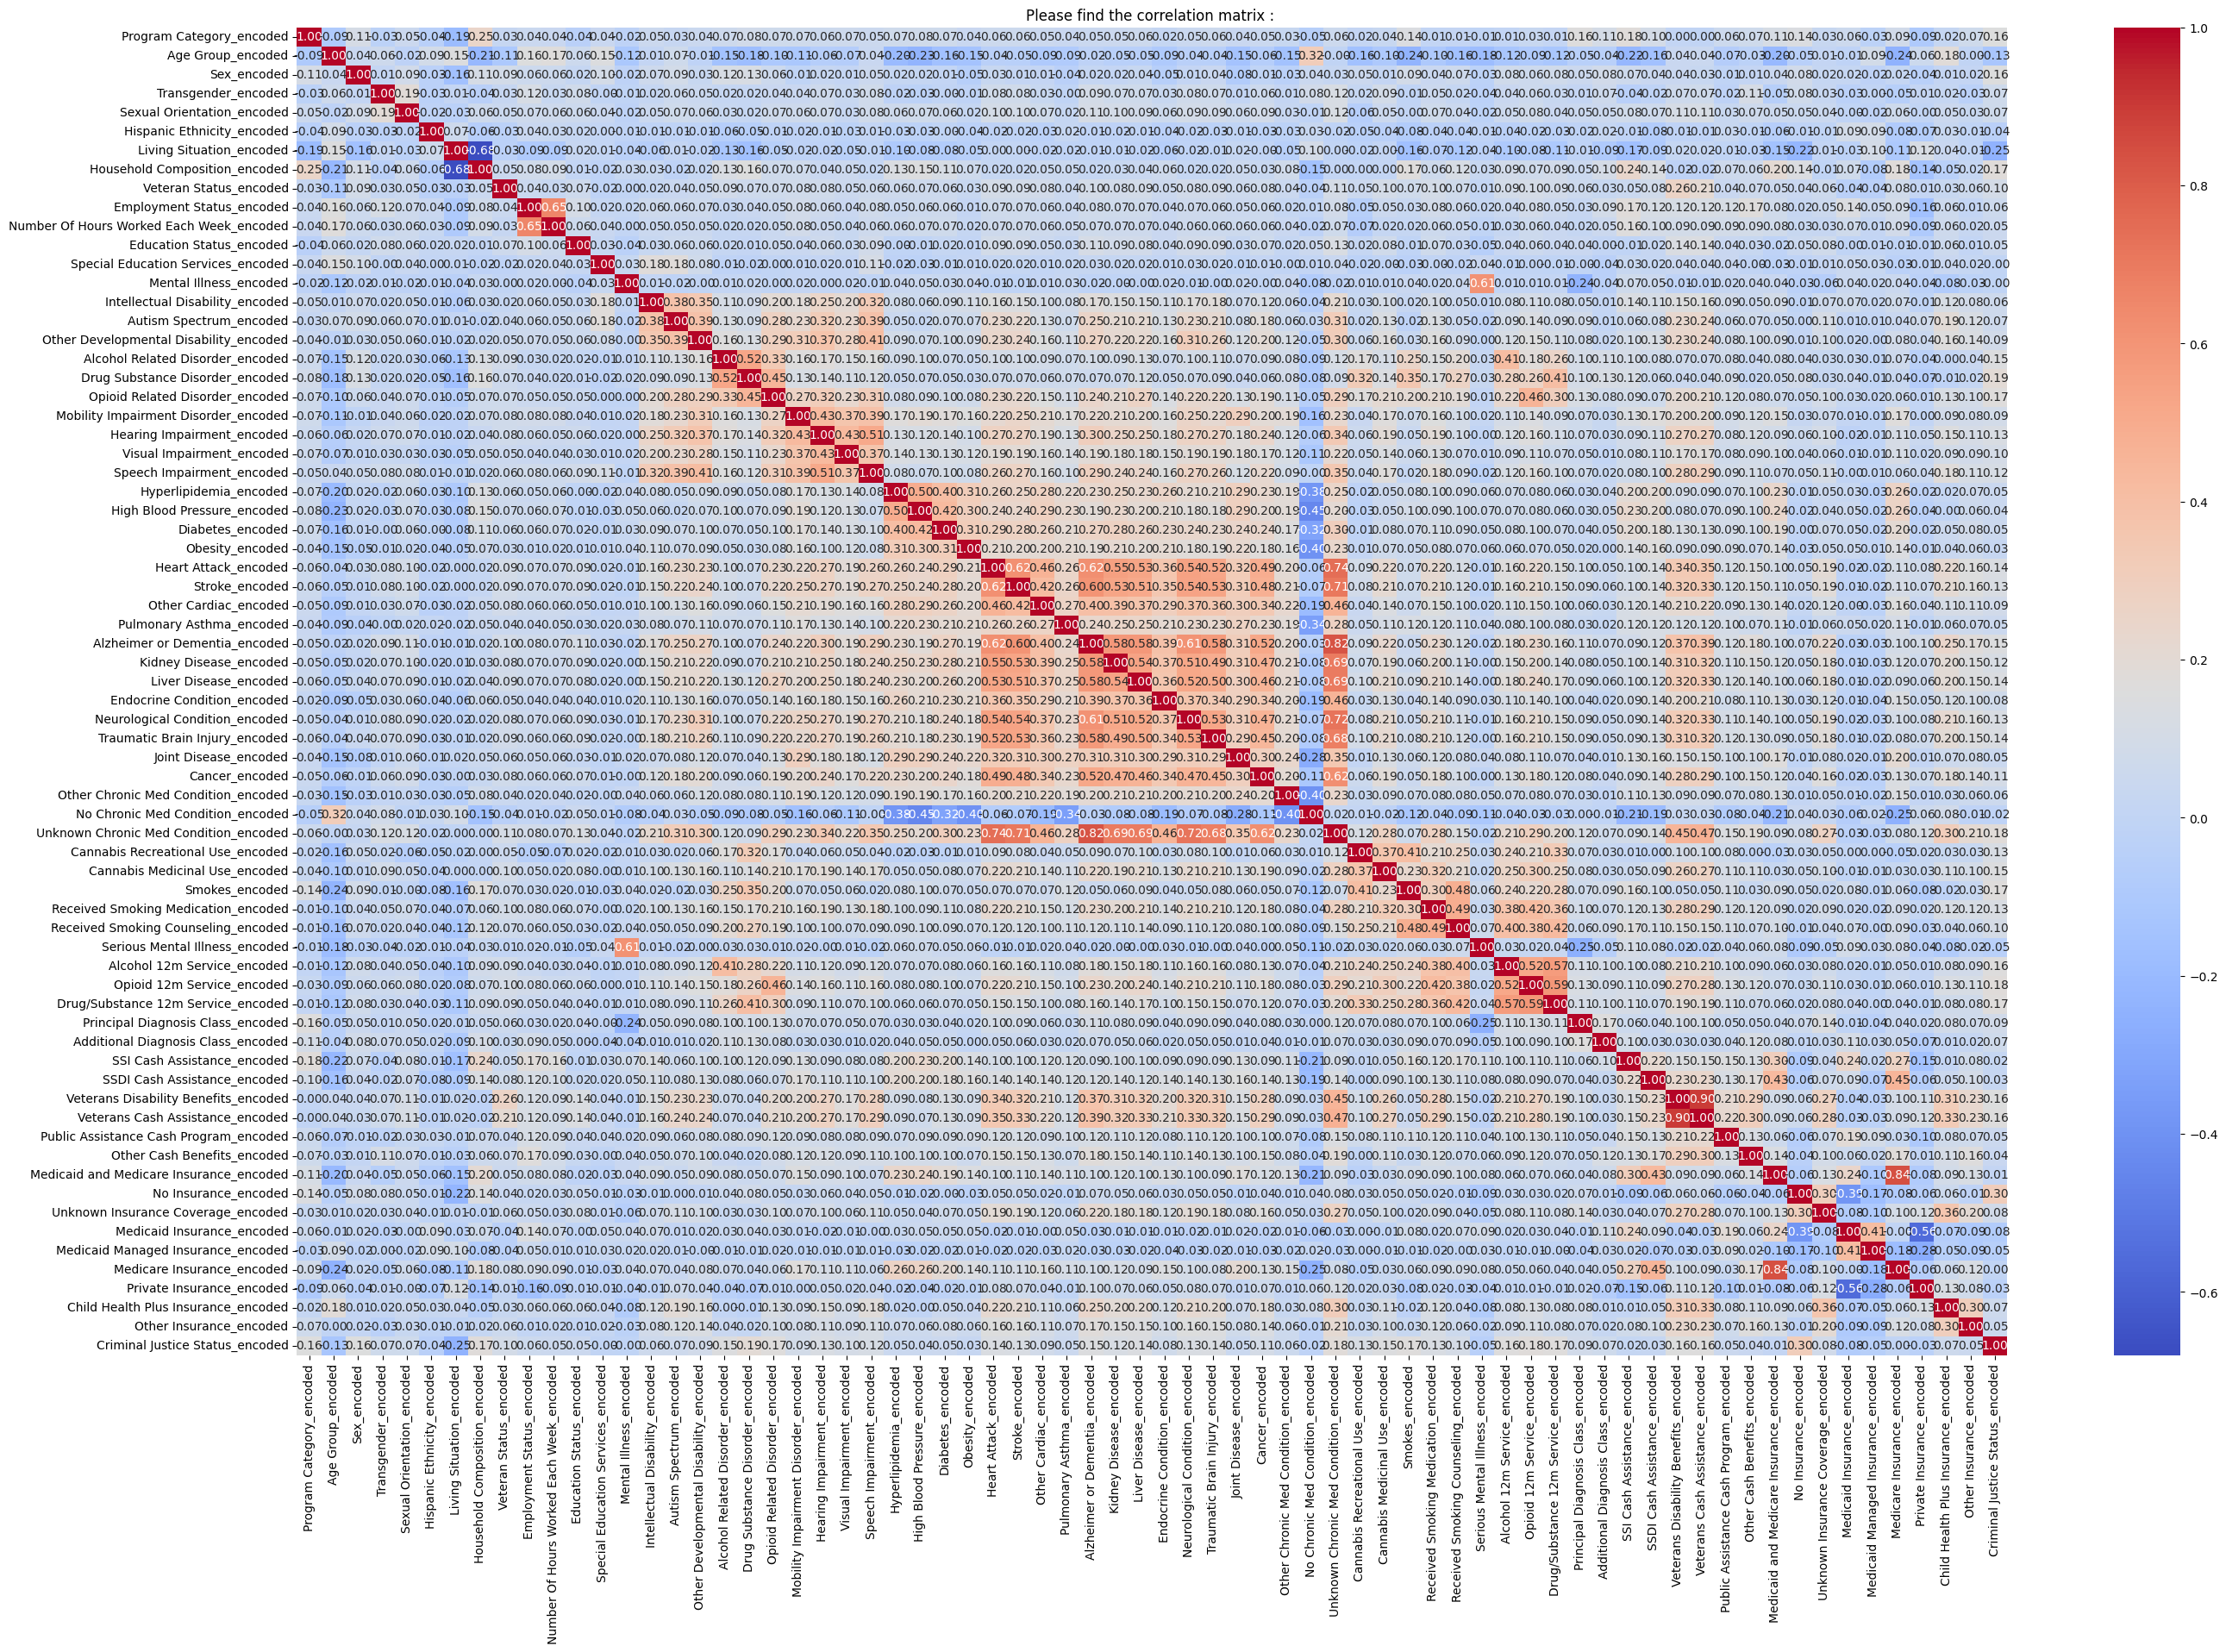

In [76]:
import pandas as pd

# encoded data set is stored as dataframe name koushik_encoded_dataset

koushik_encoded_dataset=pd.read_csv('data_encoded.csv')
# Getting the correlation matrix for koushik_encoded_dataset
correlation_matrix = koushik_encoded_dataset.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# we will be using heatmap for better visualtion of data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(32, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Please find the correlation matrix : ')
plt.show()


In [77]:
import pandas as pd

# our encoded data is stored as koushik_encoded_dataset
# Mental Illness_encoded is our target variable
#  Mental Illness_encoded is dropped from the correlation matrix for our feature target slecetion
koushik_feature_target_correlation = koushik_encoded_dataset.drop(columns=['Mental Illness_encoded']).apply(lambda x: x.corr(koushik_encoded_dataset['Mental Illness_encoded']))

# now let us display the correlation coefficients
print("Correlation with Mental Illness_encoded:")
print(koushik_feature_target_correlation)


Correlation with Mental Illness_encoded:
Program Category_encoded              -0.019223
Age Group_encoded                     -0.115320
Sex_encoded                           -0.018423
Transgender_encoded                   -0.005369
Sexual Orientation_encoded            -0.018431
                                         ...   
Medicare Insurance_encoded             0.043703
Private Insurance_encoded             -0.036555
Child Health Plus Insurance_encoded   -0.077847
Other Insurance_encoded               -0.026164
Criminal Justice Status_encoded       -0.004520
Length: 69, dtype: float64


# correlation with target variable

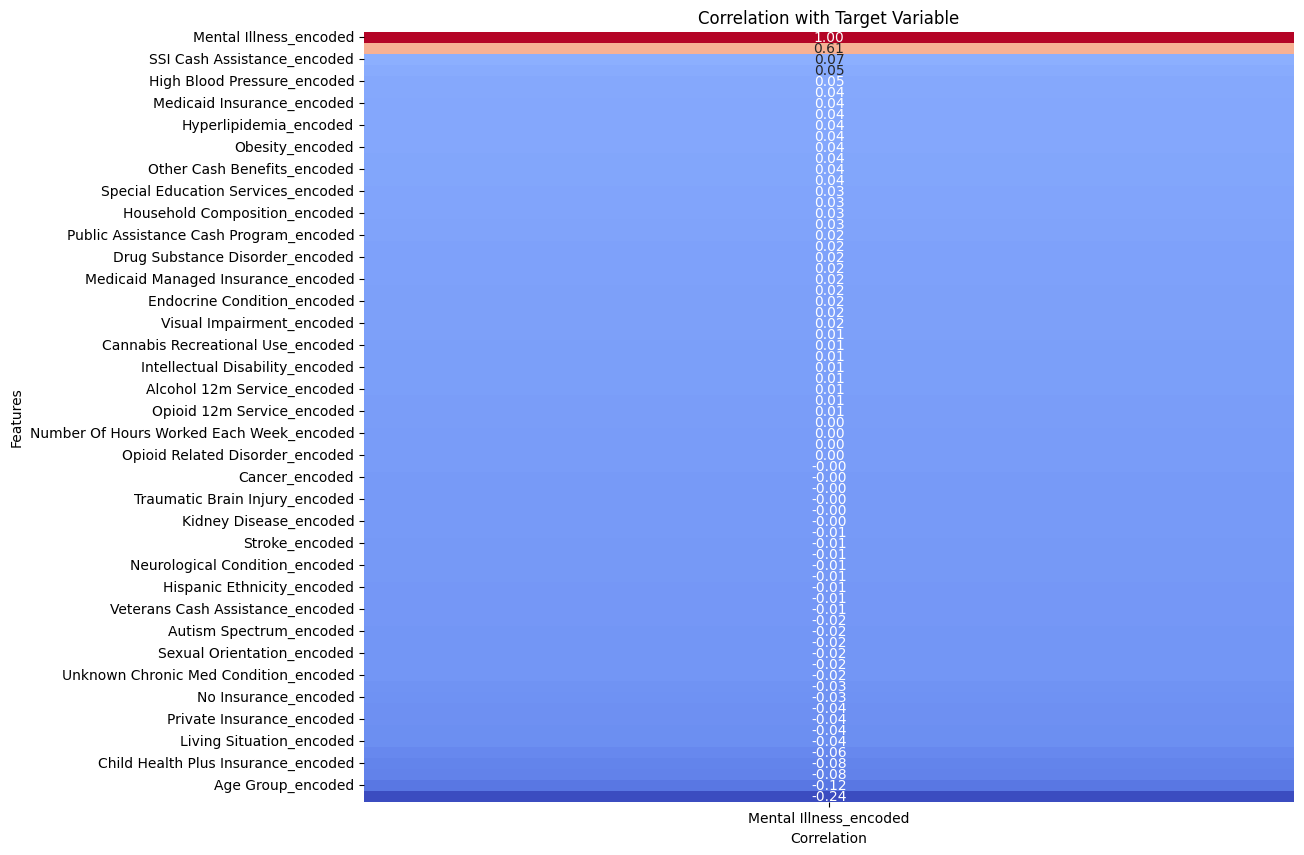

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = koushik_encoded_dataset.corr()

# Extract correlations of features with the target variable
corr_with_target = corr_matrix['Mental Illness_encoded'].sort_values(ascending=False)

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_with_target.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Correlation with Target Variable')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()


# let us do random sampling to our data set as most of the data is biased





In [79]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Definint  features (X) and target variable (y)
y = koushik_encoded_dataset['Mental Illness_encoded']
X = koushik_encoded_dataset.drop(columns=['Mental Illness_encoded'])


# We will be Splitting  the encoded data into both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  list of columns with class where imbalance can be found if found sampling is done based on the data
koushikcolumns_contain_imbalance = [
    'Program Category_encoded',
    'Age Group_encoded',
    'Sex_encoded',
    'Transgender_encoded',
    'Sexual Orientation_encoded',
    'Hispanic Ethnicity_encoded',
    'Living Situation_encoded',
    'Household Composition_encoded',
    'Veteran Status_encoded',
    'Employment Status_encoded',
    'Number Of Hours Worked Each Week_encoded',
    'Education Status_encoded',
    'Special Education Services_encoded',
    'Intellectual Disability_encoded',
    'Autism Spectrum_encoded',
    'Other Developmental Disability_encoded',
    'Alcohol Related Disorder_encoded',
    'Drug Substance Disorder_encoded',
    'Opioid Related Disorder_encoded',
    'Mobility Impairment Disorder_encoded',
    'Hearing Impairment_encoded',
    'Visual Impairment_encoded',
    'Speech Impairment_encoded',
    'Hyperlipidemia_encoded',
    'High Blood Pressure_encoded',
    'Diabetes_encoded',
    'Obesity_encoded',
    'Heart Attack_encoded',
    'Stroke_encoded',
    'Other Cardiac_encoded',
    'Pulmonary Asthma_encoded',
    'Alzheimer or Dementia_encoded',
    'Kidney Disease_encoded',
    'Liver Disease_encoded',
    'Endocrine Condition_encoded',
    'Neurological Condition_encoded',
    'Traumatic Brain Injury_encoded',
    'Joint Disease_encoded',
    'Cancer_encoded',
    'Other Chronic Med Condition_encoded',
    'No Chronic Med Condition_encoded',
    'Unknown Chronic Med Condition_encoded',
    'Cannabis Recreational Use_encoded',
    'Cannabis Medicinal Use_encoded',
    'Smokes_encoded',
    'Received Smoking Medication_encoded',
    'Received Smoking Counseling_encoded',
    'Serious Mental Illness_encoded',
    'Alcohol 12m Service_encoded',
    'Opioid 12m Service_encoded',
    'Drug/Substance 12m Service_encoded',
    'Principal Diagnosis Class_encoded',
    'Additional Diagnosis Class_encoded',
    'SSI Cash Assistance_encoded',
    'SSDI Cash Assistance_encoded',
    'Veterans Disability Benefits_encoded',
    'Veterans Cash Assistance_encoded',
    'Public Assistance Cash Program_encoded',
    'Other Cash Benefits_encoded',
    'Medicaid and Medicare Insurance_encoded',
    'No Insurance_encoded',
    'Unknown Insurance Coverage_encoded',
    'Medicaid Insurance_encoded',
    'Medicaid Managed Insurance_encoded',
    'Medicare Insurance_encoded',
    'Private Insurance_encoded',
    'Child Health Plus Insurance_encoded',
    'Other Insurance_encoded',
    'Criminal Justice Status_encoded'

]

#appropriate resampling technique is peformed on each column
for column in koushikcolumns_contain_imbalance:
    # we will be checking for the unique value counts present in the column
    uniq_cnts = X_train[column].value_counts()

    # Check if the column has class imbalance
    if len(uniq_cnts) > 1:
        print(f"Applying resampling technique for column: {column}")

        # RandomOverSampler is applied if the majority class needs to be over_sampled
        if uniq_cnts.idxmax() == 0:
            ros = RandomOverSampler(random_state=42)
            X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
        #RandomUnderSampler is applied if the majority class needs to be under_sampled
        elif uniq_cnts.idxmax() == 1:
            rus = RandomUnderSampler(random_state=42)
            X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
        # SMOTE is applied to generate synthetic samples if the classes are imbalanced
        else:
            smote = SMOTE(random_state=42)
            X_resampled, y_resampled = smote.fit_resample(X_train, y_train)




    else:
        print(f"No imbalance classes are found in the column:- {column}")
# resampled training data is splitted into the training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.15, random_state=42)



Applying resampling technique for column: Program Category_encoded
Applying resampling technique for column: Age Group_encoded
Applying resampling technique for column: Sex_encoded
Applying resampling technique for column: Transgender_encoded
Applying resampling technique for column: Sexual Orientation_encoded
Applying resampling technique for column: Hispanic Ethnicity_encoded
Applying resampling technique for column: Living Situation_encoded
Applying resampling technique for column: Household Composition_encoded
Applying resampling technique for column: Veteran Status_encoded
Applying resampling technique for column: Employment Status_encoded
Applying resampling technique for column: Number Of Hours Worked Each Week_encoded
Applying resampling technique for column: Education Status_encoded
Applying resampling technique for column: Special Education Services_encoded
Applying resampling technique for column: Intellectual Disability_encoded
Applying resampling technique for column: Auti

In [80]:
# let us display the shape of the resampled data
print("Shape of the X_resampled is:", X_resampled.shape)
print("Shape of the y_resampled is:", y_resampled.shape)

import pandas as pd

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name=y.name)

# X_resampled_df and y_resampled_df is Concatenated along with the  columns for viewing the entire  dataset which is sampled
koushik_sampled_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Print the first few rows of the sampled dataset
print("Sampled Data:")
print(koushik_sampled_data .head())


Shape of the X_resampled is: (419136, 69)
Shape of the y_resampled is: (419136,)
Sampled Data:
   Program Category_encoded  Age Group_encoded  Sex_encoded  \
0                         2                  0            1   
1                         2                  0            0   
2                         2                  0            0   
3                         4                  1            1   
4                         2                  0            1   

   Transgender_encoded  Sexual Orientation_encoded  \
0                    1                           4   
1                    1                           4   
2                    1                           1   
3                    1                           5   
4                    1                           4   

   Hispanic Ethnicity_encoded  Living Situation_encoded  \
0                           0                         2   
1                           2                         2   
2                       

# removing the low correlation features

In [81]:
import pandas as pd

# Dropping the Mental Illness_encoded from the correlation matrix as we are keen in feature target correlation
correlation_matrix = koushik_sampled_data.corr()
target_correlation = correlation_matrix['Mental Illness_encoded'].abs().sort_values(ascending=False)


threshold = 0.1

# features are identified with thje correlation coefficients that are less than the threshold
low_correlation_features = target_correlation[target_correlation < threshold].index.tolist()

# low correlation features are dropped from the dataset
koushik_procssed_data = koushik_sampled_data.drop(columns=low_correlation_features)

# displaying the list of low correlation features and shape of the updated dataset
print("The Low_Correlation Features as_follows:", low_correlation_features)
print("The_Shape of Updated Dataset:", koushik_procssed_data.shape)


The Low_Correlation Features as_follows: ['Medicaid Insurance_encoded', 'Joint Disease_encoded', 'Public Assistance Cash Program_encoded', 'Special Education Services_encoded', 'Private Insurance_encoded', 'Additional Diagnosis Class_encoded', 'Visual Impairment_encoded', 'Mobility Impairment Disorder_encoded', 'Household Composition_encoded', 'Endocrine Condition_encoded', 'Alcohol Related Disorder_encoded', 'Employment Status_encoded', 'Received Smoking Medication_encoded', 'Intellectual Disability_encoded', 'Other Cardiac_encoded', 'Hearing Impairment_encoded', 'Education Status_encoded', 'Cannabis Recreational Use_encoded', 'Opioid Related Disorder_encoded', 'Cannabis Medicinal Use_encoded', 'Other Developmental Disability_encoded', 'Other Insurance_encoded', 'Drug/Substance 12m Service_encoded', 'Alcohol 12m Service_encoded', 'Opioid 12m Service_encoded', 'Unknown Insurance Coverage_encoded', 'Hispanic Ethnicity_encoded', 'Sexual Orientation_encoded', 'Medicaid Managed Insurance_e

# predicting using ML models Random forest, XG Boost, Gradient boost

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# processed data is splitted into features (X) and target variable (y)
y_data = koushik_procssed_data['Mental Illness_encoded']
X_data = koushik_procssed_data.drop(columns=['Mental Illness_encoded'])

# data is splitted for the training, validation, and testing sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_train_data, X_validation_data, y_train_data, y_validation_data = train_test_split(X_train_data, y_train_data, test_size=0.15, random_state=42)

# we will be using RandomForestClassifier,Xgboost classifier, gradient boost classifier for predictions
random_forest_classifier = RandomForestClassifier()
xgboost_classifier = XGBClassifier()
gradient_boosting_classifier = GradientBoostingClassifier()

classifiers = {
    "Random Forest Classifier": random_forest_classifier,
    "XGBoost Classifier": xgboost_classifier,
    "Gradient Boosting Classifier": gradient_boosting_classifier
}

# each calssifier is trained and evaulated
for name, clf in classifiers.items():
    clf.fit(X_train_data, y_train_data)
    y_pred_validation = clf.predict(X_validation_data)
    accuracy_validation = accuracy_score(y_validation_data, y_pred_validation)
    print(f"The Accuracy for {name} performed on Validation Set: {accuracy_validation}")

# Testing our classifiers on the testing set
print("\nTesting Set Results:")
for name, clf in classifiers.items():
    y_pred_test = clf.predict(X_test_data)
    accuracy_test = accuracy_score(y_test_data, y_pred_test)
    print(f"The Accuracy for {name} performed on Testing Set: {accuracy_test}")


The Accuracy for Random Forest Classifier performed on Validation Set: 0.9400560669622443
The Accuracy for XGBoost Classifier performed on Validation Set: 0.9355229934190906
The Accuracy for Gradient Boosting Classifier performed on Validation Set: 0.8928961965922421

Testing Set Results:
The Accuracy for Random Forest Classifier performed on Testing Set: 0.9379324330772534
The Accuracy for XGBoost Classifier performed on Testing Set: 0.933518633392184
The Accuracy for Gradient Boosting Classifier performed on Testing Set: 0.8912058023572076


In [83]:
print("Shape of the X_train:", X_train_data.shape)
print("Shape of the y_train:", y_train_data.shape)
print("Shape of the X_test:", X_test_data.shape)
print("Shape of the y_test:", y_test_data.shape)
print("Shape of the X_validation:", X_validation_data.shape)
print("Shape of the y_validation:", y_validation_data.shape)

Shape of the X_train: (285011, 20)
Shape of the y_train: (285011,)
Shape of the X_test: (83828, 20)
Shape of the y_test: (83828,)
Shape of the X_validation: (50297, 20)
Shape of the y_validation: (50297,)


# evaluation metrics for ml models

The Evaluation metrics for the model: Random Forest Classifier (Validation Set)
Accuracy: 0.9401554764697696
Classification Report is as follows:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     16684
           1       0.95      0.90      0.92     16817
           2       1.00      0.96      0.98     16796

    accuracy                           0.94     50297
   macro avg       0.94      0.94      0.94     50297
weighted avg       0.94      0.94      0.94     50297

Confusion Matrix:
[[16030   654     0]
 [ 1751 15066     0]
 [  544    61 16191]]



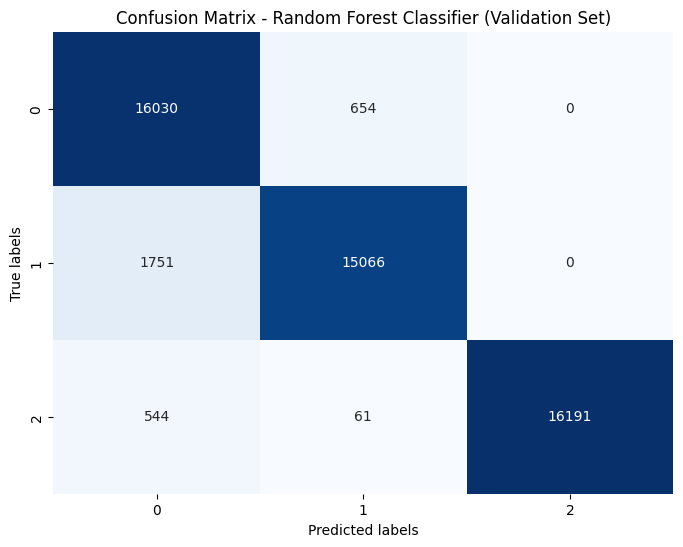

The Evaluation metrics for the model: XGBoost Classifier (Validation Set)
Accuracy: 0.9355229934190906
Classification Report is as follows:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     16684
           1       0.96      0.88      0.92     16817
           2       1.00      0.96      0.98     16796

    accuracy                           0.94     50297
   macro avg       0.94      0.94      0.94     50297
weighted avg       0.94      0.94      0.94     50297

Confusion Matrix:
[[16178   506     0]
 [ 2076 14741     0]
 [  602    59 16135]]



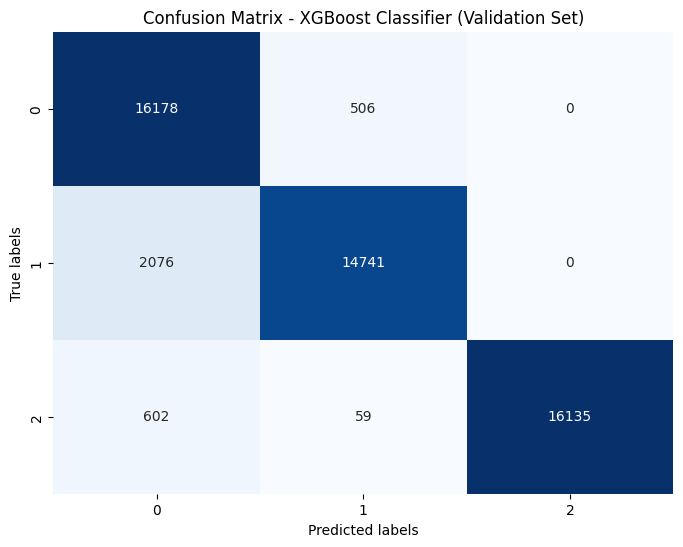

The Evaluation metrics for the model: Gradient Boosting Classifier (Validation Set)
Accuracy: 0.8928961965922421
Classification Report is as follows:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86     16684
           1       0.93      0.77      0.85     16817
           2       1.00      0.96      0.98     16796

    accuracy                           0.89     50297
   macro avg       0.90      0.89      0.89     50297
weighted avg       0.91      0.89      0.89     50297

Confusion Matrix:
[[15835   848     1]
 [ 3788 13029     0]
 [  689    61 16046]]



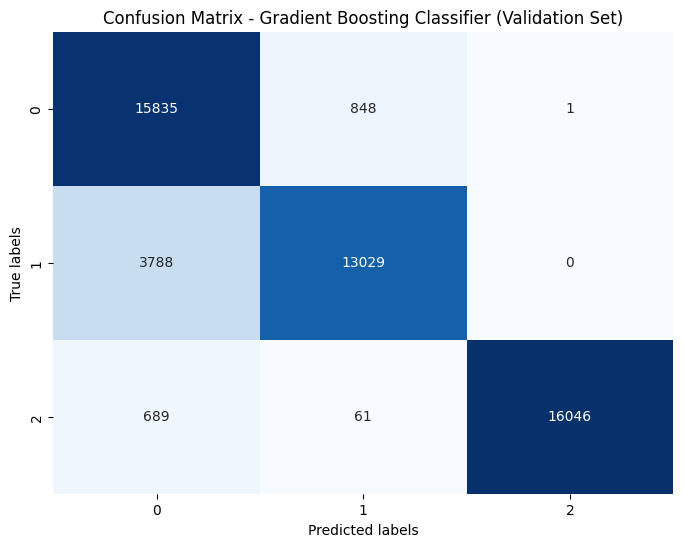


 The Testing Set Results are :
The Evaluation metrics for the model: Random Forest Classifier (Testing Set)
Accuracy: 0.9379682206422675
Classification Report is as follows:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     27881
           1       0.95      0.89      0.92     28009
           2       1.00      0.96      0.98     27938

    accuracy                           0.94     83828
   macro avg       0.94      0.94      0.94     83828
weighted avg       0.94      0.94      0.94     83828

Confusion Matrix:
[[26762  1119     0]
 [ 3010 24999     0]
 [  958   113 26867]]



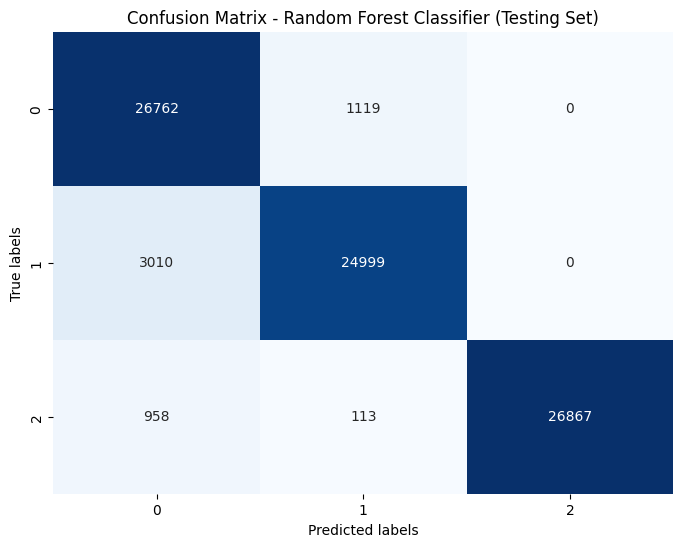

The Evaluation metrics for the model: XGBoost Classifier (Testing Set)
Accuracy: 0.933518633392184
Classification Report is as follows:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     27881
           1       0.96      0.87      0.92     28009
           2       1.00      0.96      0.98     27938

    accuracy                           0.93     83828
   macro avg       0.94      0.93      0.93     83828
weighted avg       0.94      0.93      0.93     83828

Confusion Matrix:
[[27008   873     0]
 [ 3533 24476     0]
 [ 1050   117 26771]]



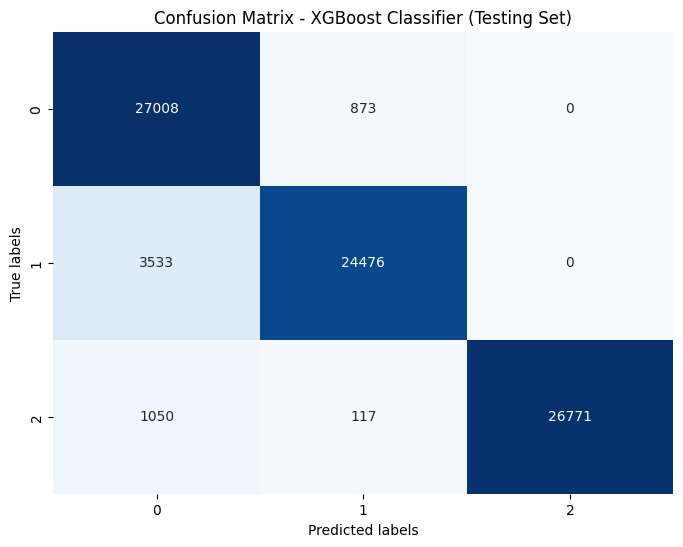

The Evaluation metrics for the model: Gradient Boosting Classifier (Testing Set)
Accuracy: 0.8912058023572076
Classification Report is as follows:
              precision    recall  f1-score   support

           0       0.78      0.95      0.85     27881
           1       0.93      0.77      0.85     28009
           2       1.00      0.95      0.98     27938

    accuracy                           0.89     83828
   macro avg       0.90      0.89      0.89     83828
weighted avg       0.90      0.89      0.89     83828

Confusion Matrix:
[[26427  1445     9]
 [ 6383 21626     0]
 [ 1182   101 26655]]



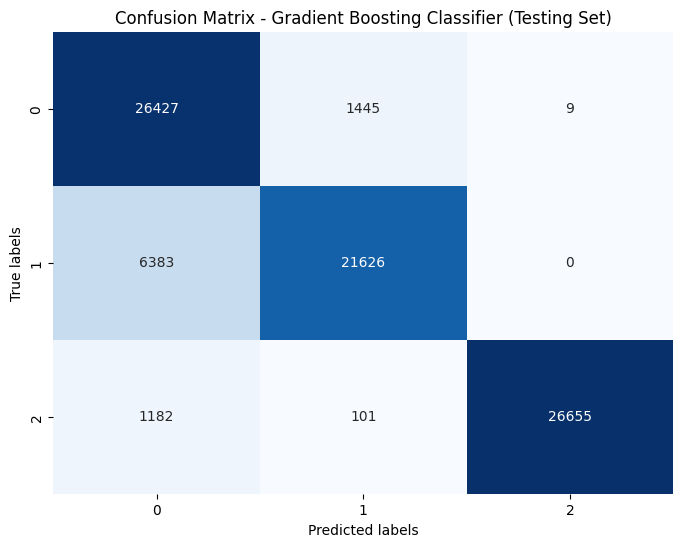

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# creating the function to display the evaluation metrics
def print_evaluation_metrics(model_name, y_true, y_pred):
    print("The Evaluation metrics for the model:", model_name)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report is as follows:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()

# evaulating the each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_data, y_train_data)
    y_pred_validation = clf.predict(X_validation_data)
    print_evaluation_metrics(name + " (Validation Set)", y_validation_data, y_pred_validation)

    # Plotting the confusion_matrix
    cm = confusion_matrix(y_validation_data, y_pred_validation)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name} (Validation Set)')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# classifiers are tested on the testing set
print("\n The Testing Set Results are :")
for name, clf in classifiers.items():
    y_pred_test = clf.predict(X_test_data)
    print_evaluation_metrics(name + " (Testing Set)", y_test_data, y_pred_test)

    # Plotting the confusion_matrix
    cm = confusion_matrix(y_test_data, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name} (Testing Set)')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


# log loss for ml models

In [98]:
from sklearn.metrics import log_loss


def calculate_log_loss(model, X_data, y_data):
    # Obtaining the predicted probabilities for each class
    y_pred_probabilities = model.predict_proba(X_data)
    # Calculating the log loss
    loss = log_loss(y_data, y_pred_probabilities)
    return loss


rf_log_loss = calculate_log_loss(random_forest_classifier, X_test_data, y_test_data)
print("Log Loss for Random Forest Classifier:", rf_log_loss)

# Calculating log loss for XGBoost Classifier
xgb_log_loss = calculate_log_loss(xgboost_classifier, X_test_data, y_test_data)
print("Log Loss for XGBoost Classifier:", xgb_log_loss)

# Calculating log loss for Gradient Boosting Classifier
gb_log_loss = calculate_log_loss(gradient_boosting_classifier, X_test_data, y_test_data)
print("Log Loss for Gradient Boosting Classifier:", gb_log_loss)


Log Loss for Random Forest Classifier: 0.18659483436240842
Log Loss for XGBoost Classifier: 0.1955270985152999
Log Loss for Gradient Boosting Classifier: 0.2885834221415162


# BUILDING SHALLOW NN FOR OUR DATA SET

In [85]:
# Importming the necessary libraries for shallow nn
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the our final processed data into features (X) and target variable (y)
y_data = koushik_procssed_data['Mental Illness_encoded']
X_data = koushik_procssed_data.drop(columns=['Mental Illness_encoded'])

# Data is splitted into the  training, validation, and testing sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_train_data, X_validation_data, y_train_data, y_validation_data = train_test_split(X_train_data, y_train_data, test_size=0.15, random_state=42)

# input shape is defined
input_shape = X_train_data.shape[1]

# shallow neural network model is initialed
koushik_shallow_nn_model = Sequential()

# we wil be adding the input layer and the hidden layer
koushik_shallow_nn_model.add(Dense(units=64, activation='relu', input_shape=(input_shape,)))

# output layer is added
koushik_shallow_nn_model.add(Dense(units=3, activation='softmax'))

# now let us compie the model
koushik_shallow_nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model is getting trained
koushik_shallow_nn_model.fit(X_train_data, y_train_data, epochs=10, batch_size=32, validation_data=(X_validation_data, y_validation_data))

# let us evaluate the model on the testing set
y_pred_test = np.argmax(koushik_shallow_nn_model.predict(X_test_data), axis=-1)
accuracy = accuracy_score(y_test_data, y_pred_test)

# dispalying the accuracy our model as follows
print("Accuracy by performing on Testing Set:", accuracy)


Epoch 1/10
8907/8907 [==============================] - 46s 5ms/step - loss: 0.3159 - accuracy: 0.8814 - val_loss: 0.2664 - val_accuracy: 0.9030
Epoch 2/10
8907/8907 [==============================] - 30s 3ms/step - loss: 0.2613 - accuracy: 0.9054 - val_loss: 0.2423 - val_accuracy: 0.9138
Epoch 3/10
8907/8907 [==============================] - 29s 3ms/step - loss: 0.2430 - accuracy: 0.9141 - val_loss: 0.2301 - val_accuracy: 0.9195
Epoch 4/10
8907/8907 [==============================] - 27s 3ms/step - loss: 0.2316 - accuracy: 0.9189 - val_loss: 0.2203 - val_accuracy: 0.9226
Epoch 5/10
8907/8907 [==============================] - 38s 4ms/step - loss: 0.2243 - accuracy: 0.9220 - val_loss: 0.2140 - val_accuracy: 0.9265
Epoch 6/10
8907/8907 [==============================] - 42s 5ms/step - loss: 0.2191 - accuracy: 0.9240 - val_loss: 0.2077 - val_accuracy: 0.9308
Epoch 7/10
8907/8907 [==============================] - 30s 3ms/step - loss: 0.2155 - accuracy: 0.9255 - val_loss: 0.2102 - val_ac

In [88]:
from sklearn.metrics import classification_report

# Training the model
history = koushik_shallow_nn_model.fit(X_train_data, y_train_data, epochs=10, batch_size=32, validation_data=(X_validation_data, y_validation_data))

# Evaluating the model on the testing set
y_pred_test = np.argmax(koushik_shallow_nn_model.predict(X_test_data), axis=-1)

# displaying the classification report
print("Classification Report for koushik Shallow Neural Network:")
print(classification_report(y_test_data, y_pred_test))

Epoch 1/10
8907/8907 [==============================] - 23s 3ms/step - loss: 0.2063 - accuracy: 0.9290 - val_loss: 0.2021 - val_accuracy: 0.9308
Epoch 2/10
8907/8907 [==============================] - 21s 2ms/step - loss: 0.2051 - accuracy: 0.9290 - val_loss: 0.1980 - val_accuracy: 0.9333
Epoch 3/10
8907/8907 [==============================] - 22s 2ms/step - loss: 0.2033 - accuracy: 0.9295 - val_loss: 0.1949 - val_accuracy: 0.9327
Epoch 4/10
8907/8907 [==============================] - 22s 2ms/step - loss: 0.2027 - accuracy: 0.9299 - val_loss: 0.1978 - val_accuracy: 0.9326
Epoch 5/10
8907/8907 [==============================] - 22s 3ms/step - loss: 0.2015 - accuracy: 0.9302 - val_loss: 0.2059 - val_accuracy: 0.9276
Epoch 6/10
8907/8907 [==============================] - 25s 3ms/step - loss: 0.2006 - accuracy: 0.9305 - val_loss: 0.1950 - val_accuracy: 0.9340
Epoch 7/10
8907/8907 [==============================] - 25s 3ms/step - loss: 0.2003 - accuracy: 0.9308 - val_loss: 0.1974 - val_ac

# LOG LOSS FOR SHALLOW NN

In [97]:
from sklearn.metrics import log_loss

# Assuming y_pred_test contains the predicted probabilities for each class
y_pred_probabilities = koushik_shallow_nn_model.predict(X_test_data)

# Calculate the log loss
logloss = log_loss(y_test_data, y_pred_probabilities)

print("Log Loss for Shadow Neural Network Model:", logloss)


2620/2620 [==============================] - 5s 2ms/step
Log Loss for Shadow Neural Network Model: 0.20115235864559144


# comparing with ml models and shallow nn models

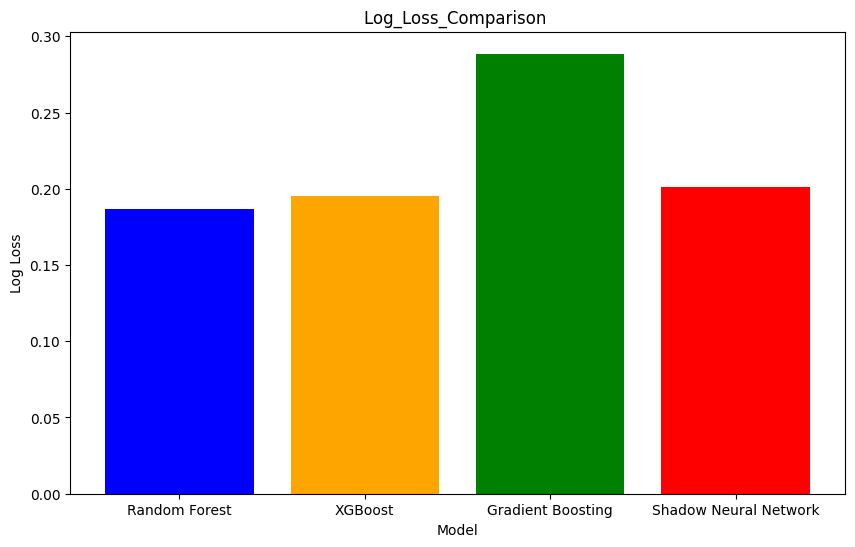

In [100]:
import matplotlib.pyplot as plt

# Log loss values for each model
log_loss_values = [0.18659483436240842, 0.1955270985152999, 0.2885834221415162, 0.20115235864559144]

# Model names
model_nams_koushik = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Shadow Neural Network']


plt.figure(figsize=(10, 6))
plt.bar(model_nams_koushik, log_loss_values, color=['blue', 'orange', 'green', 'red'])


plt.title('Log_Loss_Comparison ')
plt.xlabel('Model')
plt.ylabel('Log Loss')


plt.show()


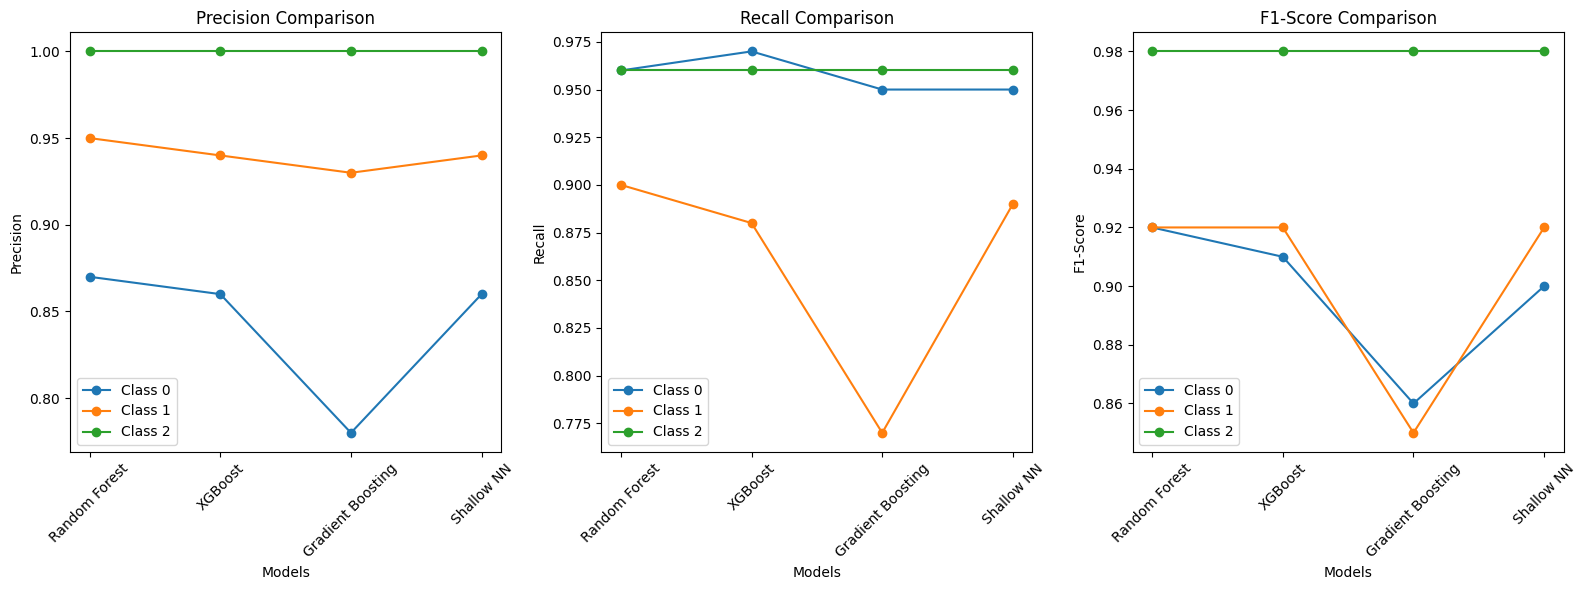

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Define data for precision, recall, and F1-score for each class and model
models = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Shallow NN']

precision_data = {
    'Class 0': [0.87, 0.86, 0.78, 0.86],
    'Class 1': [0.95, 0.94, 0.93, 0.94],
    'Class 2': [1.00, 1.00, 1.00, 1.00]
}

recall_data = {
    'Class 0': [0.96, 0.97, 0.95, 0.95],
    'Class 1': [0.90, 0.88, 0.77, 0.89],
    'Class 2': [0.96, 0.96, 0.96, 0.96]
}

f1_score_data = {
    'Class 0': [0.92, 0.91, 0.86, 0.90],
    'Class 1': [0.92, 0.92, 0.85, 0.92],
    'Class 2': [0.98, 0.98, 0.98, 0.98]
}

# Create line plots for precision, recall, and F1-score
plt.figure(figsize=(16, 6))

# Precision line plot
plt.subplot(1, 3, 1)
for class_name, values in precision_data.items():
    plt.plot(models, values, marker='o', label=class_name)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Recall line plot
plt.subplot(1, 3, 2)
for class_name, values in recall_data.items():
    plt.plot(models, values, marker='o', label=class_name)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# F1-score line plot
plt.subplot(1, 3, 3)
for class_name, values in f1_score_data.items():
    plt.plot(models, values, marker='o', label=class_name)
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


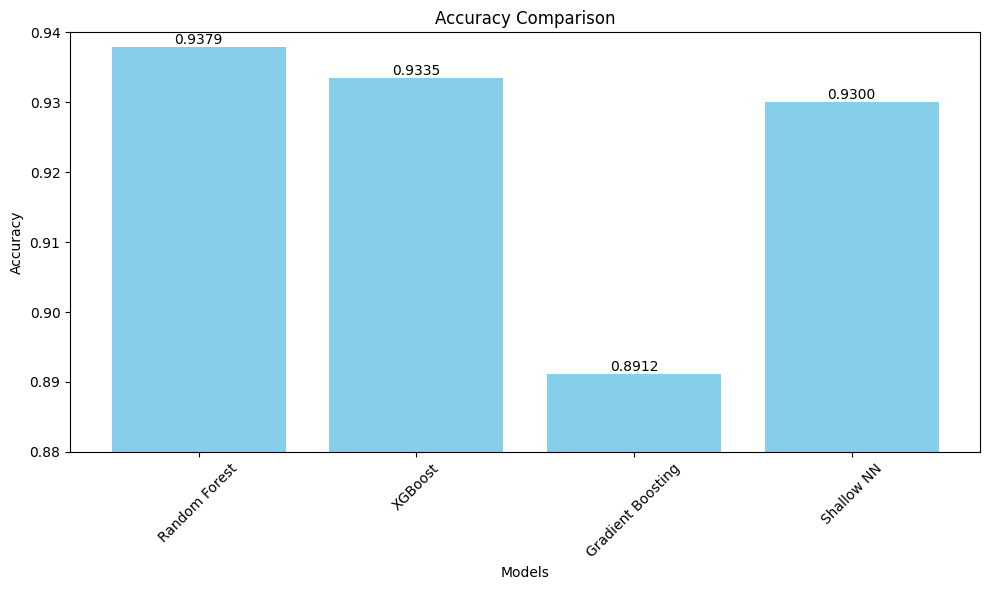

In [94]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Shallow NN']
accuracies = [0.9379, 0.9335, 0.8912, 0.9300]


plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0.88, 0.94)
plt.xticks(rotation=45)


for i in range(len(models)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# BY TUNING THE HYPERPARAETER IN SHALLOW NN

In [87]:
# trying by tuning the hyper parameters with 3 different sets
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#assigning the input shape
input_shape = X_train_data.shape[1]

# model 1
model_koushik1 = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape,)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model_koushik1.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model  2
model_koushik2 = Sequential([
    Dense(64, activation='tanh', input_shape=(input_shape,)),
    Dense(3, activation='softmax')
])
model_koushik2.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model  3
model_koushik3 = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model_koushik3.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the and model 1
model_koushik1.fit(X_train_data, y_train_data, epochs=10, batch_size=32, validation_data=(X_validation_data, y_validation_data))
y_pred_test1 = np.argmax(model_koushik1.predict(X_test_data), axis=-1)
accuracy1 = accuracy_score(y_test_data, y_pred_test1)
print("Accuracy for Model 1:", accuracy1)

# Training the and evaluate Model 2
model_koushik2.fit(X_train_data, y_train_data, epochs=10, batch_size=32, validation_data=(X_validation_data, y_validation_data))
y_pred_test2 = np.argmax(model_koushik2.predict(X_test_data), axis=-1)
accuracy2 = accuracy_score(y_test_data, y_pred_test2)
print("Accuracy for Model  2:", accuracy2)

# Training and evaluating the model 3
model_koushik3.fit(X_train_data, y_train_data, epochs=10, batch_size=32, validation_data=(X_validation_data, y_validation_data))
y_pred_test3 = np.argmax(model_koushik3.predict(X_test_data), axis=-1)
accuracy3 = accuracy_score(y_test_data, y_pred_test3)
print("Accuracy for Model  3:", accuracy3)


Epoch 1/10
8907/8907 [==============================] - 28s 3ms/step - loss: 0.2939 - accuracy: 0.8904 - val_loss: 0.2489 - val_accuracy: 0.9105
Epoch 2/10
8907/8907 [==============================] - 26s 3ms/step - loss: 0.2426 - accuracy: 0.9131 - val_loss: 0.2251 - val_accuracy: 0.9203
Epoch 3/10
8907/8907 [==============================] - 26s 3ms/step - loss: 0.2238 - accuracy: 0.9225 - val_loss: 0.2220 - val_accuracy: 0.9251
Epoch 4/10
8907/8907 [==============================] - 28s 3ms/step - loss: 0.2141 - accuracy: 0.9261 - val_loss: 0.2026 - val_accuracy: 0.9326
Epoch 5/10
8907/8907 [==============================] - 26s 3ms/step - loss: 0.2088 - accuracy: 0.9279 - val_loss: 0.2008 - val_accuracy: 0.9300
Epoch 6/10
8907/8907 [==============================] - 23s 3ms/step - loss: 0.2047 - accuracy: 0.9291 - val_loss: 0.1988 - val_accuracy: 0.9329
Epoch 7/10
8907/8907 [==============================] - 26s 3ms/step - loss: 0.2015 - accuracy: 0.9304 - val_loss: 0.1919 - val_ac